! Check data



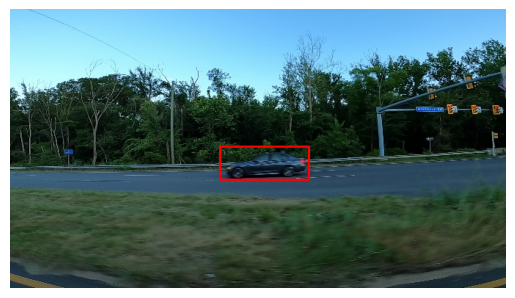

True

In [4]:
import cv2
import matplotlib.pyplot as plt
import os 
image_path = os.path.join("./data\\traffic_car\\training_images\\vid_4_600.jpg")
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

points = [(286.6396527, 187.5241313), (407.9479016, 232.0286358)]

cv2.rectangle(image, 
              (int(points[0][0]), int(points[0][1])), 
              (int(points[1][0]), int(points[1][1])), 
              color=(255, 0, 0), 
              thickness=2)

plt.imshow(image)
plt.axis('off') 
plt.show()

output_path = 'output_image.jpg'
cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


In [44]:
import os
import time
import random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

c:\Users\toanv\miniconda3\envs\supervised\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
img_h, img_w, num_channels = (380, 676, 3) 
df = pd.read_csv('./data/traffic_car/train_solution_bounding_boxes.csv')
df.rename(columns={'image':'image_id'}, inplace=True) #rename the imgae column as the convention in yolo5
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
# remove the file extension from the image id column
df['x_center'] = (df['xmin'] + df['xmax'])/2 # center coordinate calclations
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin'] # wifht and height calculation
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w   # Normalization of coordinates they should be between 0 and 1
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0
